In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

# 파일 경로 리스트
file_paths = [
    "../광진구 공모전/station_time_populations_6시_10시.csv "
]

# 총합

In [2]:
# 데이터프레임 불러오기 및 통합
dfs = []
for path in file_paths:
    df = pd.read_csv(path, encoding='utf-8')
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [3]:
# 승차/하차 컬럼 분리
boarding_columns = [col for col in combined_df.columns if '승차총승객수' in col]
alighting_columns = [col for col in combined_df.columns if '하차총승객수' in col]


In [6]:
# melt를 통해 데이터 재구성 (시간대 컬럼을 행으로)
melted_df = combined_df.melt(
    id_vars=['processed_station_name'],
    value_vars=boarding_columns + alighting_columns,
    var_name='시간대',
    value_name='승객수'
)

ValueError: value_name (승객수) cannot match an element in the DataFrame columns.

In [ ]:
# 시간대 문자열 정리 (예: '00시승차총승객수' -> '00시 승차')
melted_df['시간대'] = melted_df['시간대'].str.replace('총승객수', '').str.replace('시', '시 ').str.strip()

# 시간 정렬용 숫자 추출
melted_df['정렬'] = melted_df['시간대'].apply(lambda x: int(x.split('시')[0]))

In [7]:
# 정류장별, 시간대별 승객수 집계
station_time_population = melted_df.groupby(
    ['processed_station_name', '시간대', '정렬']
)['승객수'].sum().reset_index()

# 시간대 정렬 후 불필요한 컬럼 제거
station_time_populations = station_time_population.sort_values(
    by=['processed_station_name', '정렬']
).drop(columns='정렬')

In [8]:
print(station_time_populations )

     processed_station_name     시간대   승객수
0                 CU중곡긴고랑점앞  00시 승차     0
1                 CU중곡긴고랑점앞  00시 하차     0
22                CU중곡긴고랑점앞   1시 승차     0
23                CU중곡긴고랑점앞   1시 하차     0
32                CU중곡긴고랑점앞   2시 승차     0
...                     ...     ...   ...
8859          화양사거리성수SKV1센터  21시 하차  1062
8860          화양사거리성수SKV1센터  22시 승차   100
8861          화양사거리성수SKV1센터  22시 하차   980
8862          화양사거리성수SKV1센터  23시 승차    27
8863          화양사거리성수SKV1센터  23시 하차   330

[8880 rows x 3 columns]


In [9]:
# 히트맵용 피벗 테이블 생성
heatmap_data = station_time_populations.pivot(
    index='processed_station_name',
    columns='시간대',
    values='승객수'
).fillna(0)

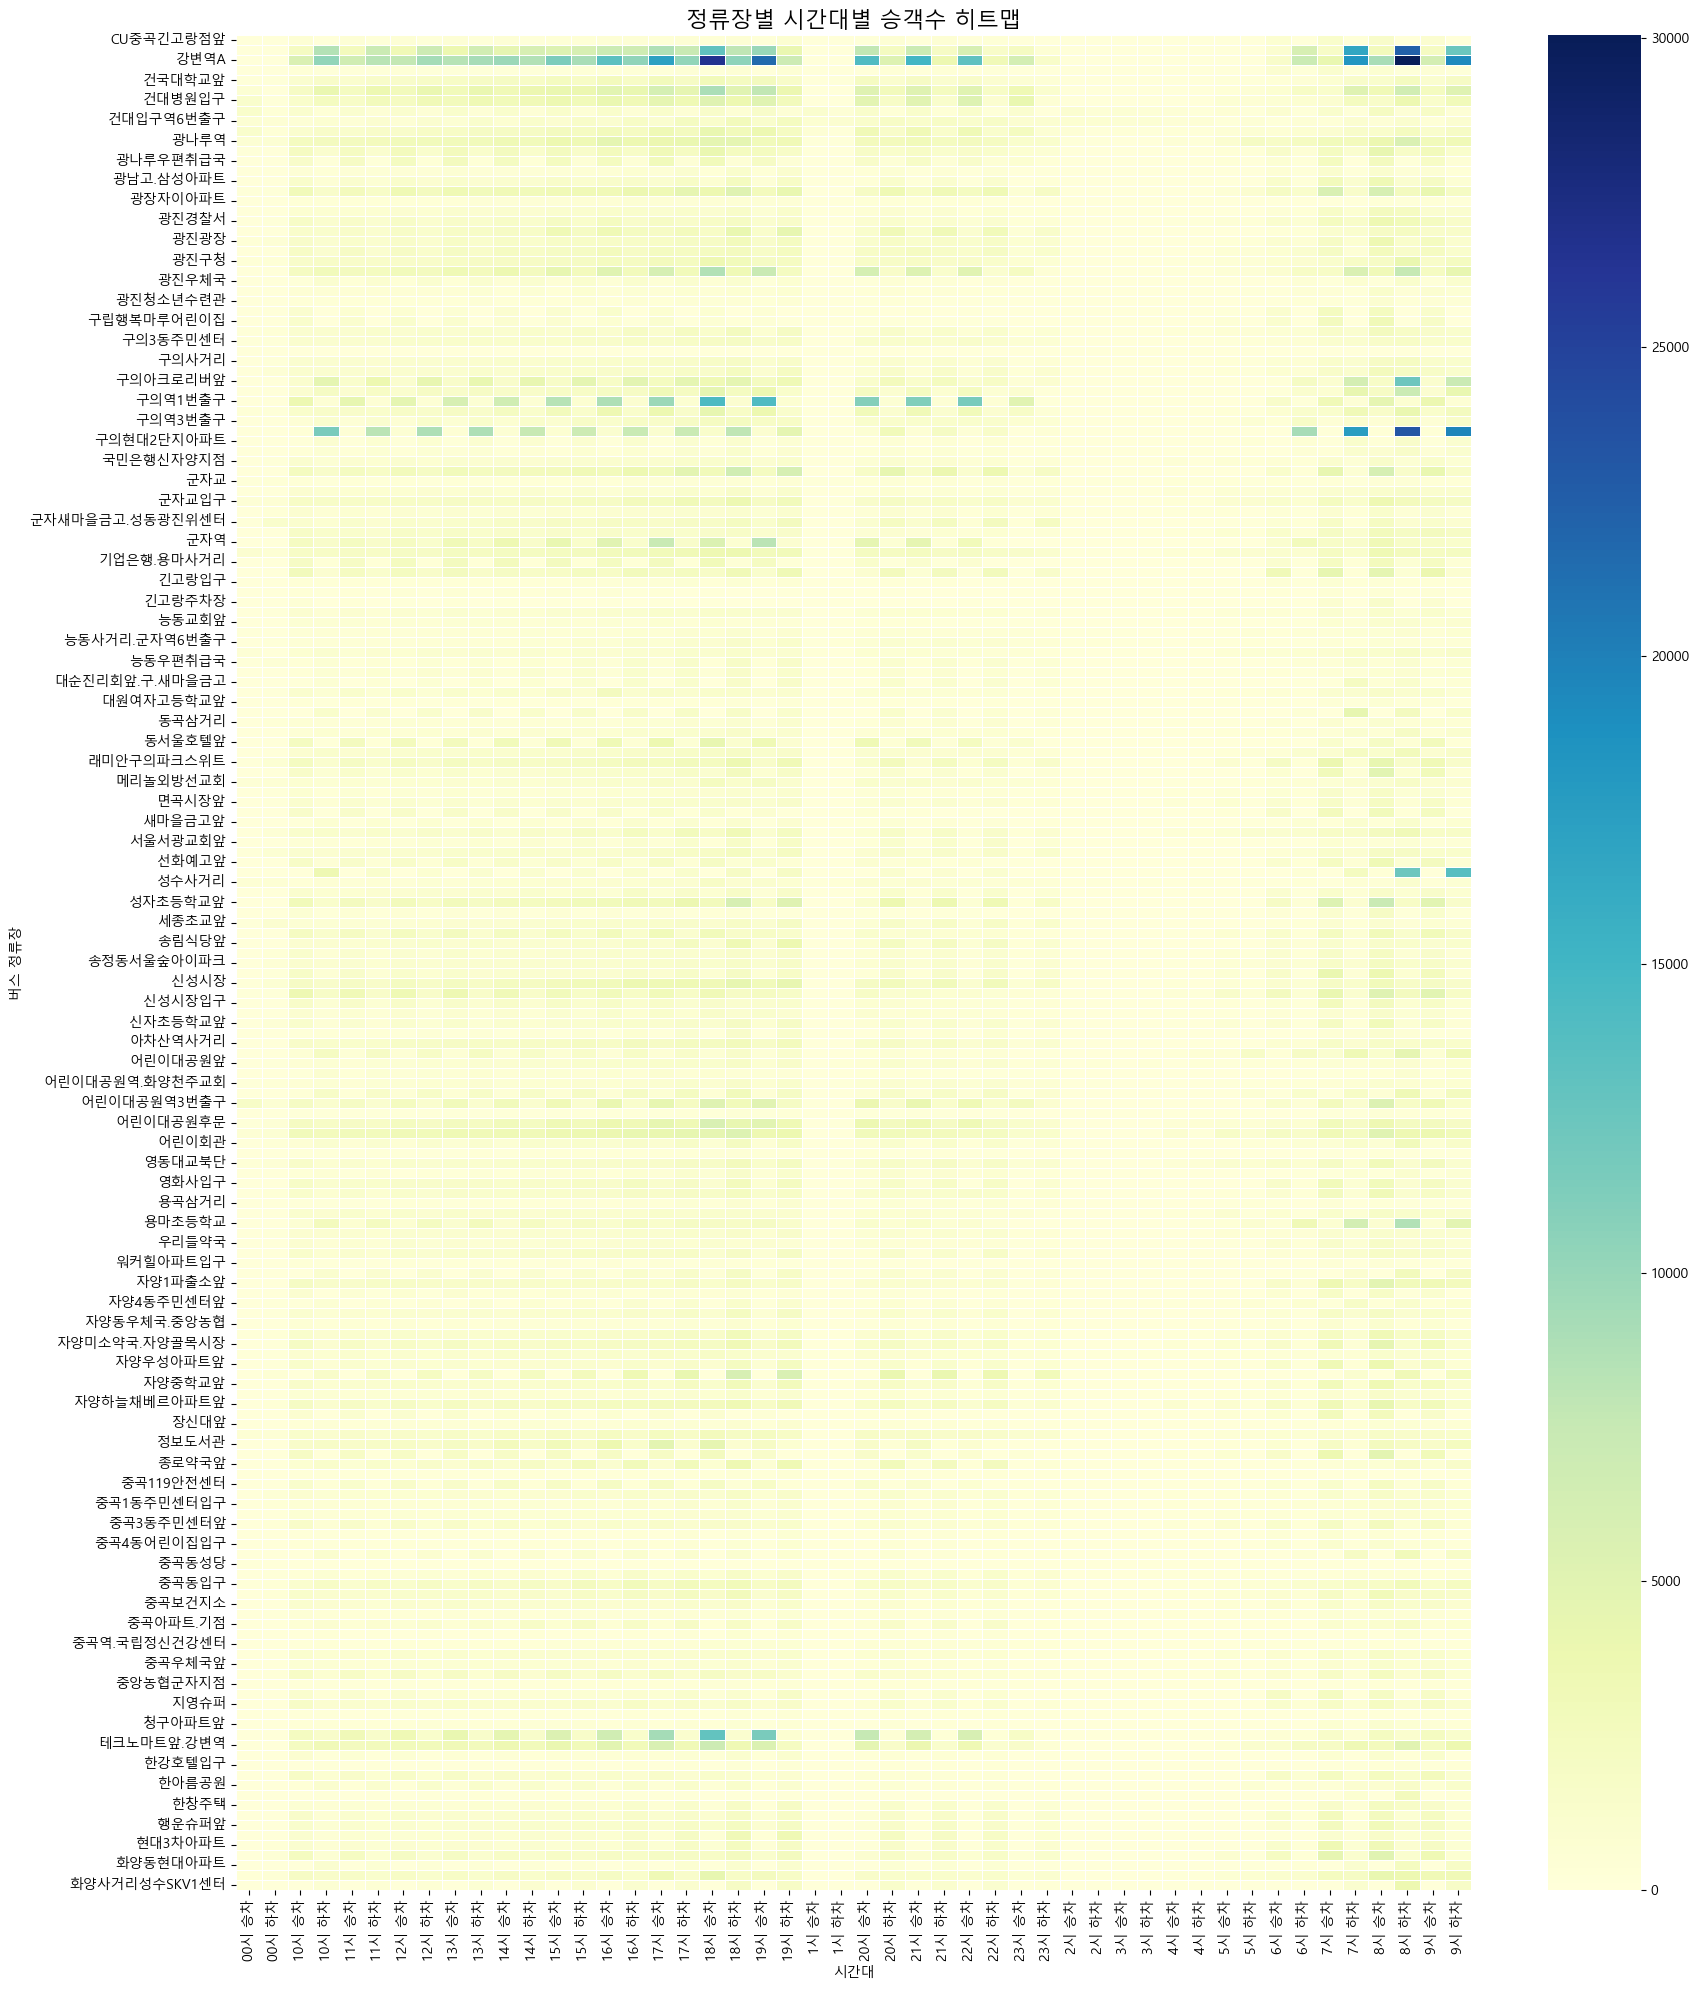

In [10]:
# 히트맵 시각화
plt.figure(figsize=(18, 20))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("정류장별 시간대별 승객수 히트맵", fontsize=16)
plt.xlabel("시간대")
plt.ylabel("버스 정류장")
plt.tight_layout()
plt.show()

# 평균

In [11]:
# 2. 파일 읽기 및 통합
dfs = []
for path in file_paths:
    df = pd.read_csv(path, encoding='utf-8')
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [12]:
# 3. 승차/하차 컬럼 추출
boarding_columns = [col for col in combined_df.columns if '승차총승객수' in col]
alighting_columns = [col for col in combined_df.columns if '하차총승객수' in col]

In [13]:
# 4. melt를 통해 시간대를 행으로 재구성
melted_df = combined_df.melt(
    id_vars=['processed_station_name'],
    value_vars=boarding_columns + alighting_columns,
    var_name='시간대',
    value_name='승객수'
)

In [14]:
# 5. 시간대 포맷 정리: '00시승차총승객수' → '00시 승차'
melted_df['시간대'] = melted_df['시간대'].str.replace('총승객수', '').str.replace('시', '시 ').str.strip()

In [15]:
# 6. 정렬용 숫자 컬럼 생성 (예: '00시 승차' → 0)
melted_df['정렬'] = melted_df['시간대'].apply(lambda x: int(x.split('시')[0]))


In [16]:
# 7. 정류장별 시간대별 **평균 승객수** 계산
station_time_avg = melted_df.groupby(
    ['processed_station_name', '시간대', '정렬']
)['승객수'].mean().reset_index()

In [17]:
# 8. 정렬 후 피벗 테이블 구성 (히트맵용)
station_time_avg_sorted = station_time_avg.sort_values(by=['processed_station_name', '정렬'])
heatmap_avg_data = station_time_avg_sorted.pivot(
    index='processed_station_name',
    columns='시간대',
    values='승객수'
).fillna(0)

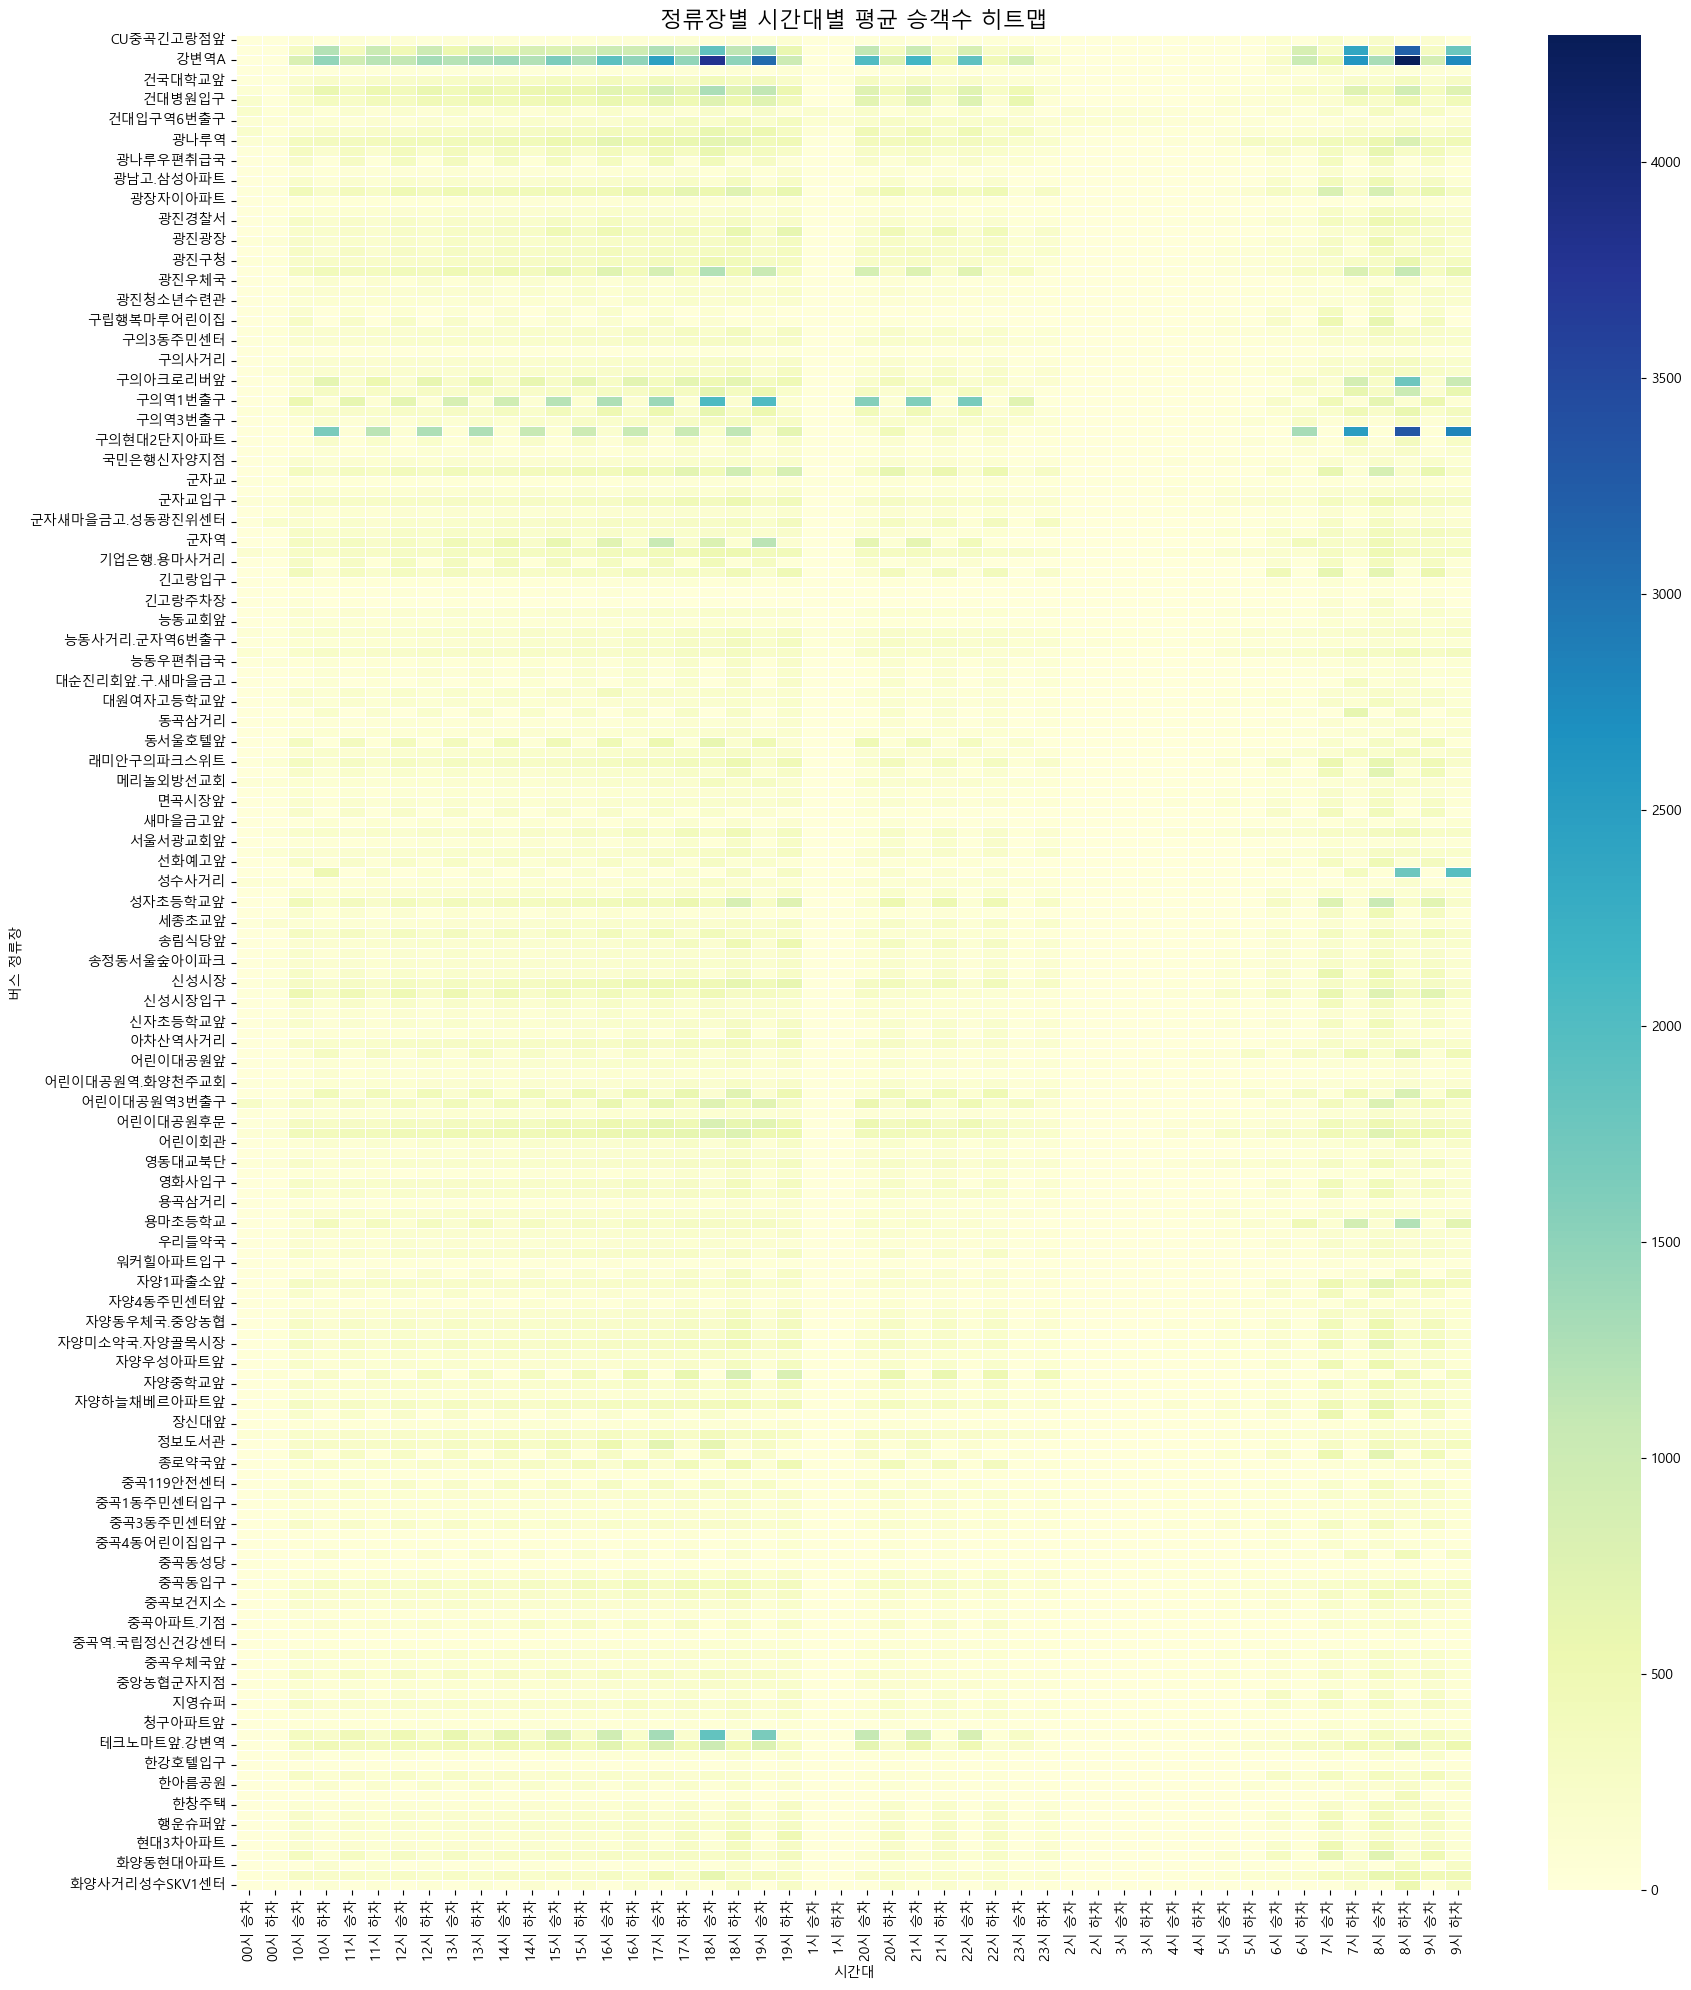

In [18]:
# 9. 히트맵 시각화
plt.figure(figsize=(18, 20))
sns.heatmap(heatmap_avg_data, cmap="YlGnBu", linewidths=0.5)
plt.title("정류장별 시간대별 평균 승객수 히트맵", fontsize=16)
plt.xlabel("시간대")
plt.ylabel("버스 정류장")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# 예시: 파일 경로 리스트
file_paths = [
    "../광진구 공모전/2023년11월.xlsx - Sheet1.csv",
    "../광진구 공모전/2023년12월.xlsx - Sheet1.csv",
    "../광진구 공모전/2024년11월.xlsx - Sheet1.csv",
    "../광진구 공모전/2024년2월.xlsx - Sheet1.csv",
    "../광진구 공모전/2025년 1월.xlsx - Sheet1.csv"
]

# 모든 파일을 읽어서 하나로 합치기
dfs = []
for path in file_paths:
    df = pd.read_csv(path, encoding='utf-8')
    df['월'] = path.split("년")[0] + "-" + path.split("년")[1].split("월")[0]  # '2023-11' 형식으로 추가
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)


In [27]:
# 시간대별 컬럼 목록 만들기
boarding_columns = [col for col in df.columns if '승차총승객수' in col]
alighting_columns = [col for col in df.columns if '하차총승객수' in col]

# 역별 총합 계산
df['총승차'] = df[boarding_columns].sum(axis=1)
df['총하차'] = df[alighting_columns].sum(axis=1)

# 역별 그룹화 (같은 역명이 여러 번 나타날 수 있음)
station_summary = df.groupby("processed_station_name")[["총승차", "총하차"]].sum().reset_index()
station_summary = station_summary.sort_values(by="총승차", ascending=False)
print(station_summary)


    processed_station_name    총승차    총하차
2                     강변역A  25787  23420
35                 구의역1번출구  19060   1538
167            테크노마트.광진문화원  12678   2530
1               강변역.테크노마트앞  12330  17674
23                광진문화예술회관  10195   7181
..                     ...    ...    ...
182          화양사거리성수SKV1센터    114   2574
65                   대원외고앞     40   3370
149                중곡4동파출소     24   2397
131               자양종합복지관앞     19   7191
157               중곡아파트.종점     15    761

[183 rows x 3 columns]


In [25]:
# 시간대별 총합 (모든 역 기준)
time_summary = pd.DataFrame({
    "시간대": [col.replace("승차총승객수", "") for col in boarding_columns],
    "총승차": df[boarding_columns].sum().values,
    "총하차": df[alighting_columns].sum().values
})
print(time_summary)


    시간대    총승차    총하차
0   00시   2683   3594
1    1시    726    857
2    2시    593    642
3    3시    480    531
4    4시   2384   1292
5    5시   6255   4916
6    6시  16634  13692
7    7시  31838  27347
8    8시  46263  45995
9    9시  35078  34981
10  10시  27619  26115
11  11시  26782  25025
12  12시  30042  28061
13  13시  32060  30073
14  14시  32273  30892
15  15시  33910  33467
16  16시  36480  36420
17  17시  40111  39845
18  18시  47403  48884
19  19시  36705  40715
20  20시  27840  29962
21  21시  25851  27359
22  22시  22417  25471
23  23시  10854  13597


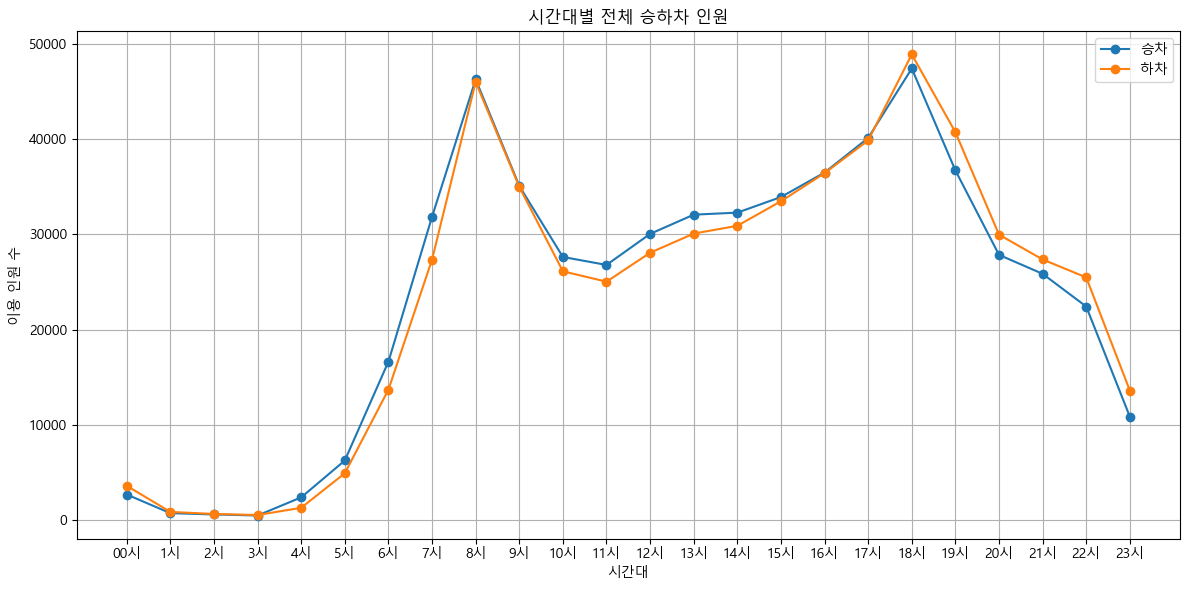

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_summary["시간대"], time_summary["총승차"], marker='o', label='승차')
plt.plot(time_summary["시간대"], time_summary["총하차"], marker='o', label='하차')
plt.title("시간대별 전체 승하차 인원")
plt.xlabel("시간대")
plt.ylabel("이용 인원 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
